<a href="https://colab.research.google.com/github/fercho-116/practicalwork/blob/main/practicalwork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrenando con batch_size=128, learning_rate=0.001, epochs=20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8015 - loss: 0.6479 - val_accuracy: 0.9310 - val_loss: 0.2282
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9427 - loss: 0.1962 - val_accuracy: 0.9533 - val_loss: 0.1618
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9663 - loss: 0.1167 - val_accuracy: 0.9582 - val_loss: 0.1370
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9768 - loss: 0.0806 - val_accuracy: 0.9594 - val_loss: 0.1350
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9860 - loss: 0.0524 - val_accuracy: 0.9641 - val_loss: 0.1212
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9889 - loss: 0.0418 - val_accuracy: 0.9643 - val_loss: 0.1211
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9928 - loss: 0.0290 - val_accuracy: 0.9617 - val_loss: 0.1292
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9949 - loss: 0.0216 - 

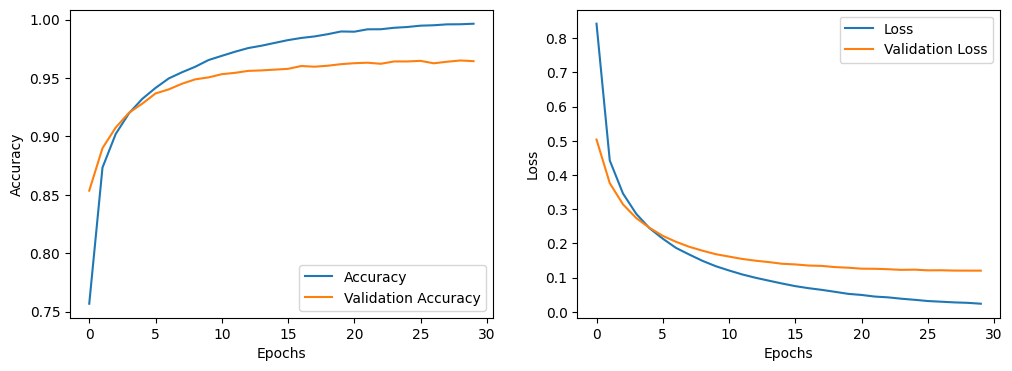

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

# Cargar dataset KMNIST
dataset = tfds.load("kmnist", split=["train", "test"], as_supervised=True)
train_dataset, test_dataset = dataset[0], dataset[1]

# Convertir dataset a numpy arrays
x_train, y_train = [], []
x_test, y_test = [], []

for image, label in train_dataset:
    x_train.append(image.numpy())
    y_train.append(label.numpy())
for image, label in test_dataset:
    x_test.append(image.numpy())
    y_test.append(label.numpy())

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

# Normalización de datos (entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dividir datos en Train, Validation y Test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Aplanar imágenes para MLP (de 28x28 a 784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convertir etiquetas en formato categórico
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Prueba de diferentes hiperparámetros
hyperparams = [
    {"batch_size": 128, "learning_rate": 0.001, "epochs": 20},
    {"batch_size": 256, "learning_rate": 0.0005, "epochs": 25},
    {"batch_size": 512, "learning_rate": 0.0003, "epochs": 30}
]

best_model = None
best_acc = 0

for params in hyperparams:
    print(f"Entrenando con batch_size={params['batch_size']}, learning_rate={params['learning_rate']}, epochs={params['epochs']}")

    # Definir modelo MLP
    model = keras.Sequential([
        keras.layers.Dense(1024, activation='relu', input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')
    ])

    # Compilar modelo
    model.compile(
        optimizer=keras.optimizers.AdamW(learning_rate=params['learning_rate']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entrenar modelo
    history = model.fit(
        x_train, y_train, validation_data=(x_val, y_val),
        epochs=params['epochs'], batch_size=params['batch_size'], verbose=1
    )

    # Evaluar en test
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}\n")

    # Guardar el mejor modelo
    if test_acc > best_acc:
        best_acc = test_acc
        best_model = model
        best_params = params

print(f"Mejor modelo con batch_size={best_params['batch_size']}, learning_rate={best_params['learning_rate']}, epochs={best_params['epochs']}")

# Graficar rendimiento
def plot_metrics(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_metrics(history)

# Guardar mejor modelo
best_model.save("best_mlp_kmnist.h5")


